# Case Study – HR Leavers

## About Case study

The company you work for is reviewing the staffing performance and has identified attrition (people leaving) rates as a good KPI to measure this. When the HR team look at the data, they are concerned about the number of people who seem to be leaving and want to understand the reasons behind it.

As a member of the analytics and visualization team, you’ve been asked to analyse the data and help the business understand the reasons why people leave and identify any common/groups of attributes.


## Data Variables and their description

| Field Name            | Description                                                       | Type    |
|-----------------------|-------------------------------------------------------------------|---------|
| satisfaction_level    | Level of satisfaction (0-1)                                       | numeric |
| last_evaluation       | Time since last performance evaluation (in Years)                 | numeric |
| number_project        | Number of projects completed while at work                        | numeric |
| average_montly_hours  | Average monthly hours at workplace                                | numeric |
| time_spend_company    | Number of years spent in the company                              | numeric |
| Work_accident         | Whether the employee had a workplace accident (1 or 0)            | numeric |
| left                  | Whether the employee left the workplace or not (1 or 0)           | numeric |
| promotion_last_5years | Whether the employee was promoted in the last five years (1 or 0) | numeric |
| department            | Department in which they work for                                 | string  |
| salary scale          | Relative level of salary (high - medium - low)                    | string  |

In [2]:
# Install necessary packages

install.packages('ggplot2')

Installing package into '/home/nbcommon/R'
(as 'lib' is unspecified)


In [3]:
# Load data

HR <- read.csv('https://onedrive.live.com/download?cid=0CDFE5661336D233&resid=CDFE5661336D233%21130&authkey=AFc73iAjvG93q3w', header=TRUE)

In [4]:
# Find if there are any missing values in the dataset

na_count <-sapply(HR, function(y) sum(length(which(is.na(y)))))
na_count <- data.frame(na_count)
na_count

,na_count
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
department,0
salary.scale,0


There are no missing values in the dataset

In [5]:
# Let's examine the structure of the dataset
str(HR)

'data.frame':	14999 obs. of  10 variables:
 $ satisfaction_level   : num  0.38 0.8 0.11 0.72 0.37 0.41 0.1 0.92 0.89 0.42 ...
 $ last_evaluation      : num  0.53 0.86 0.88 0.87 0.52 0.5 0.77 0.85 1 0.53 ...
 $ number_project       : int  2 5 7 5 2 2 6 5 5 2 ...
 $ average_montly_hours : int  157 262 272 223 159 153 247 259 224 142 ...
 $ time_spend_company   : int  3 6 4 5 3 3 4 5 5 3 ...
 $ Work_accident        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ left                 : int  1 1 1 1 1 1 1 1 1 1 ...
 $ promotion_last_5years: int  0 0 0 0 0 0 0 0 0 0 ...
 $ department           : Factor w/ 10 levels "IT","RandD","accounting",..: 8 8 8 8 8 8 8 8 8 8 ...
 $ salary.scale         : Factor w/ 3 levels "high","low","medium": 2 3 3 2 2 2 2 2 2 2 ...


In [6]:
# Let's examine first few rows of data

head(HR)

satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary.scale
0.38,0.53,2,157,3,0,1,0,sales,low
0.80,0.86,5,262,6,0,1,0,sales,medium
0.11,0.88,7,272,4,0,1,0,sales,medium
0.72,0.87,5,223,5,0,1,0,sales,low
0.37,0.52,2,159,3,0,1,0,sales,low
0.41,0.50,2,153,3,0,1,0,sales,low


In [7]:
# Convert Work_accident variable to factor

HR$Work_accident <- factor(HR$Work_accident)

In [8]:
# Convert promotion_last_5years variable to factor

HR$promotion_last_5years <- factor(HR$promotion_last_5years)

In [9]:
# Convert number_project variable to factor

HR$number_project <- factor(HR$number_project)

In [10]:
# Convert left variable to factor

HR$left <- factor(HR$left)

In [11]:
# Let's examine the distribution of salary scales

table(HR$salary.scale)


  high    low medium 
  1237   7316   6446 

The salary levels are not in proper order. Let's re-order them.

In [12]:
# Re-order Salary from Low to High

HR$salary.scale = factor(HR$salary, levels = c('low','medium','high'))

In [13]:
# Salary Category Vs attrition by Proportion

round(prop.table(table(HR$salary.scale, HR$left)),2)

        
            0    1
  low    0.34 0.14
  medium 0.34 0.09
  high   0.08 0.01

**Attrition seems to be high among Low salaried employees followed by medium salaried.**

***Let's examine as why attrition is high among low salaried employees***

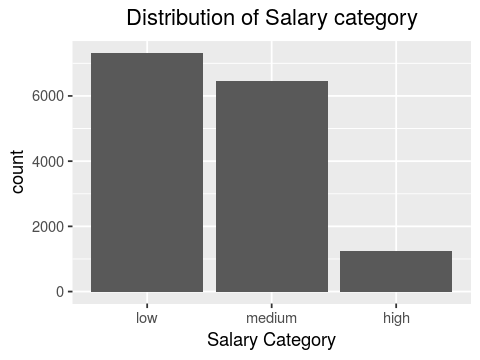

In [14]:
# Let's examine which salary category has high employee count
## Bar plot by salary category

library(ggplot2)

ggplot(aes(x=salary.scale),data=HR) +
    geom_bar() +
    xlab('Salary Category') +
    ggtitle('Distribution of Salary category')+
    theme(plot.title = element_text(hjust = 0.5))

As expected, low salaried employees are high in number followed by medium and high salaried employees.


Loading required package: repr


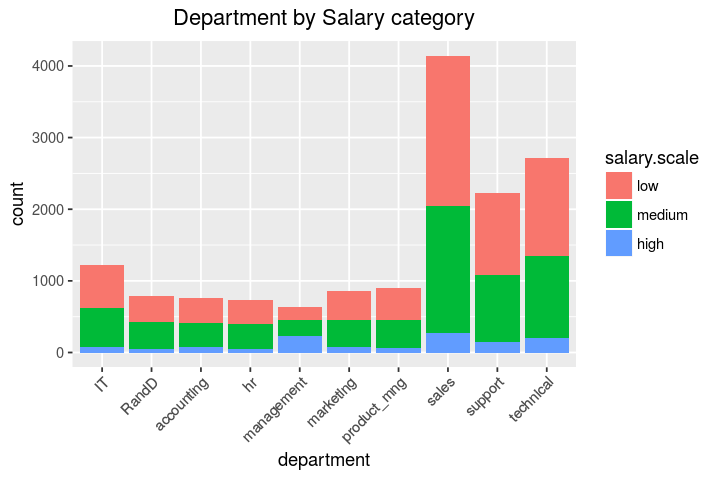

In [15]:
# Bar plot by Department, Salary Category

require(repr)
options(repr.plot.width = 6, repr.plot.height = 4)

library(ggplot2)

ggplot(aes(x=department, fill = salary.scale),data=HR) +
    geom_bar() +
    theme(axis.text.x = element_text(angle=45,hjust=1)) +
    ggtitle('Department by Salary category')+
    theme(plot.title = element_text(hjust = 0.5))

As Sales department has highest employee count, attrition should be high in this department. Let's examine if that is right.

In [16]:
# Department Vs attrition

attrition <- round(prop.table(table(HR$department, HR$left)),2)

colnames(attrition) <- c('not_left','left')

attrition

             
              not_left left
  IT              0.06 0.02
  RandD           0.04 0.01
  accounting      0.04 0.01
  hr              0.03 0.01
  management      0.04 0.01
  marketing       0.04 0.01
  product_mng     0.05 0.01
  sales           0.21 0.07
  support         0.11 0.04
  technical       0.13 0.05

As assumed earlier, **Sales department has high attrition** followed by Technical and Support departments.  

***Let's examine why Sales department has high attrition***

## Let's examine each variable influencing attrition

### Role of Work accident in attrition

In [17]:
# department Vs Work_accident

WorkAccident <- round(prop.table(table(HR$department, HR$Work_accident)),2)

colnames(WorkAccident) <- c('no_accident', 'had_accident')

WorkAccident

             
              no_accident had_accident
  IT                 0.07         0.01
  RandD              0.04         0.01
  accounting         0.04         0.01
  hr                 0.04         0.01
  management         0.04         0.01
  marketing          0.05         0.01
  product_mng        0.05         0.01
  sales              0.24         0.04
  support            0.13         0.02
  technical          0.16         0.03

**Work accidents** seems to be **high in Sales department** followed by technical and support departments.

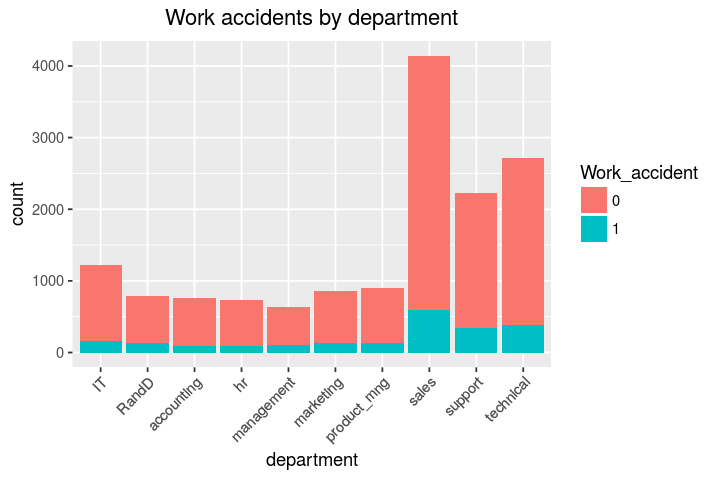

In [18]:
# Bar plot Work_accident, department

require(repr)
options(repr.plot.width = 6, repr.plot.height = 4)

library(ggplot2)

ggplot(aes(department, fill = Work_accident), data = HR) +
    geom_bar() +
    theme(axis.text.x = element_text(angle=45,hjust=1)) +
    ggtitle('Work accidents by department')+
    theme(plot.title = element_text(hjust = 0.5))

In [19]:
# Which salary categories have high work accidents

WA_salary <- round(addmargins(prop.table(table(HR$salary.scale, HR$Work_accident))),2)

colnames(WA_salary) <- c('no_accident', 'had_accident','Sum')

WA_salary

,no_accident,had_accident,Sum
low,0.42,0.07,0.49
medium,0.37,0.06,0.43
high,0.07,0.01,0.08
Sum,0.86,0.14,1.00


Work accidents recorded are high among **Low** and **Medium** salaried employees.

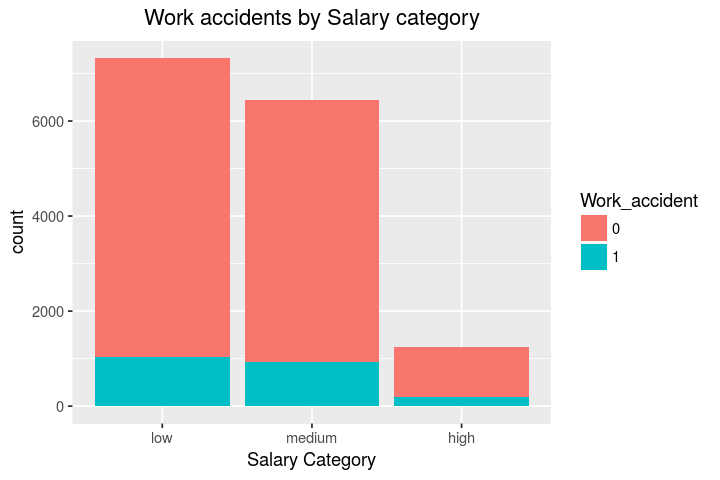

In [20]:
# Bar plot Work accidents, Salary categories

require(repr)
options(repr.plot.width = 6, repr.plot.height = 4)

library(ggplot2)

ggplot(aes(salary.scale, fill=Work_accident), data = HR) +
    geom_bar() +
    xlab('Salary Category') +
    ggtitle('Work accidents by Salary category')+
    theme(plot.title = element_text(hjust = 0.5))

**By examining Work accidents variable, it is clearly evident that this is one of the reasons for high attrition among low and medium salaried employees.**   

Also, **Sales department has high work accidents recorded**, is it because they go out on field work? Interestingly, technical and support department also recorded high work accidents next to sales. Why is that? ***Is this something to do with working conditions in the organization?***

Let's examine other variables.

### Role of Time spent in the company in attrition

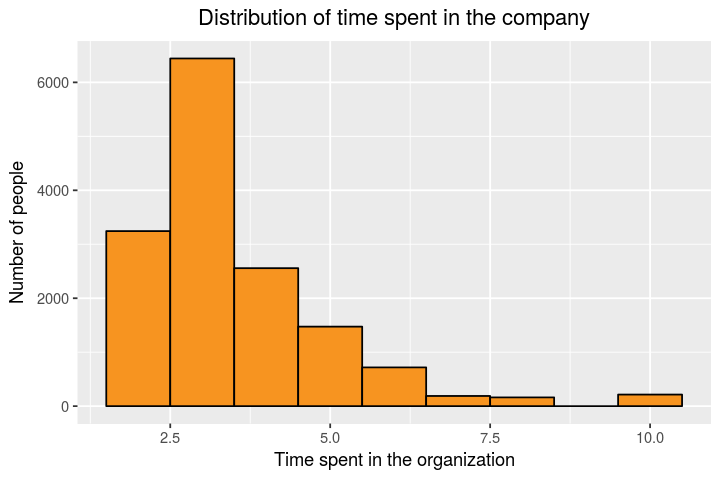

In [21]:
# Distribution of time_spend_company

require(repr)
options(repr.plot.width = 6, repr.plot.height = 4)

library(ggplot2)

ggplot(aes(time_spend_company), data=HR) +
    geom_histogram(binwidth=1, color='black', fill = "#F79420") +
    xlab('Time spent in the organization') +
    ylab('Number of people') +
    ggtitle('Distribution of time spent in the company')+
    theme(plot.title = element_text(hjust = 0.5))

Majority of employees spent less than 6 years in the organization

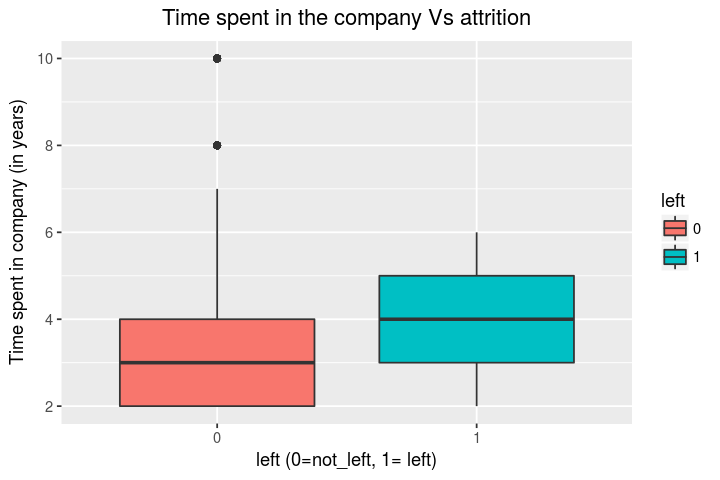

In [22]:
# Box plot of time_spend_company Vs left

require(repr)
options(repr.plot.width = 6, repr.plot.height = 4)

library(ggplot2)

ggplot(aes(x=left,y=time_spend_company, fill = left), data=HR) +
    geom_boxplot() +
    xlab('left (0=not_left, 1= left)') +
    ylab('Time spent in company (in years)') +
    ggtitle('Time spent in the company Vs attrition')+
    theme(plot.title = element_text(hjust = 0.5))

The median time spent in the company among employees who left the company is higher compared to employees who stayed

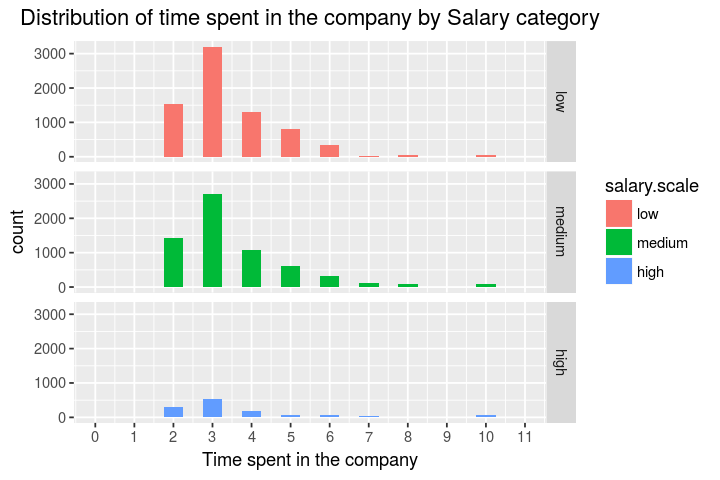

In [23]:
# Distribution of time_spend_company by salary category

require(repr)
options(repr.plot.width = 6, repr.plot.height = 4)

library(ggplot2)

ggplot(aes(time_spend_company, fill=salary.scale), data=HR) +
    geom_histogram(binwidth=0.5) +
    scale_x_continuous(limits=c(0,11),breaks = seq(0,11,1)) +
    facet_grid(salary.scale ~ .) +
    xlab('Time spent in the company') +
    ggtitle('Distribution of time spent in the company by Salary category')+
    theme(plot.title = element_text(hjust = 0.5))

The time spent in the company among low and medium salaried employees is following same distribution. 


In [24]:
# Summary of time_spend_company by department

by(HR$time_spend_company, HR$department, summary)

HR$department: IT
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   3.000   3.000   3.469   4.000  10.000 
------------------------------------------------------------ 
HR$department: RandD
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   3.000   3.000   3.367   4.000   8.000 
------------------------------------------------------------ 
HR$department: accounting
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   3.000   3.000   3.523   4.000  10.000 
------------------------------------------------------------ 
HR$department: hr
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   3.000   3.000   3.356   4.000   8.000 
------------------------------------------------------------ 
HR$department: management
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   3.000   3.000   4.303   5.000  10.000 
------------------------------------------------------------ 
HR$department: marketing
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00    3.00  

On an average the time spent in the company for each department is hovering around 3.5 and management being the highest with 4.3 years.  

In [25]:
by(HR$time_spend_company, HR$left, summary)

HR$left: 0
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00    2.00    3.00    3.38    4.00   10.00 
------------------------------------------------------------ 
HR$left: 1
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   3.000   4.000   3.877   5.000   6.000 

**left=0 means** ***not_left*** whereas **left =1 means** ***left***   

Also, the average time spend is slightly high among employees who left the firm which is expected.  


### Role of average monthly hours in attrition

In [26]:
# Summary of average monthly hours by salary cateegory

by(HR$average_montly_hours, HR$salary.scale, summary)

HR$salary.scale: low
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     96     155     199     201     246     310 
------------------------------------------------------------ 
HR$salary.scale: medium
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   96.0   156.0   201.0   201.3   245.0   310.0 
------------------------------------------------------------ 
HR$salary.scale: high
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   96.0   161.0   199.0   199.9   241.0   307.0 

The average monthly hours seems to be in the same range among low, medium and high salaried employees.  

Let's examine average monthly hours among different departments.

In [27]:
# Summary of average monthly hours by department

by(HR$average_montly_hours, HR$department, summary)

HR$department: IT
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   96.0   160.0   199.0   202.2   245.0   308.0 
------------------------------------------------------------ 
HR$department: RandD
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   98.0   157.0   200.0   200.8   248.0   308.0 
------------------------------------------------------------ 
HR$department: accounting
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   97.0   153.5   199.0   201.2   247.0   310.0 
------------------------------------------------------------ 
HR$department: hr
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   98.0   152.0   197.0   198.7   242.0   310.0 
------------------------------------------------------------ 
HR$department: management
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   97.0   161.0   204.0   201.2   243.0   307.0 
------------------------------------------------------------ 
HR$department: marketing
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   96.0   154.0  

The average monthly hours seems to be in similar range among departments. **Also, average monthly hours is not extremely high in sales department where we observed high attrition.**

In [28]:
# Summary of average monthly hours by attrition

by(HR$average_montly_hours, HR$left, summary)

HR$left: 0
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   96.0   162.0   198.0   199.1   238.0   287.0 
------------------------------------------------------------ 
HR$left: 1
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  126.0   146.0   224.0   207.4   262.0   310.0 

**left=0 means** ***not_left*** whereas **left =1 means** ***left***   

The average monthly hours seems to be on a higher side for employees who left. 

To some extent, the variable 'average_montly_hours' could have influenced attrition but doesn't seem to be strong contributor as *'average_montly_hours' by salary category* and *'average_montly_hours' by department* suggests so.

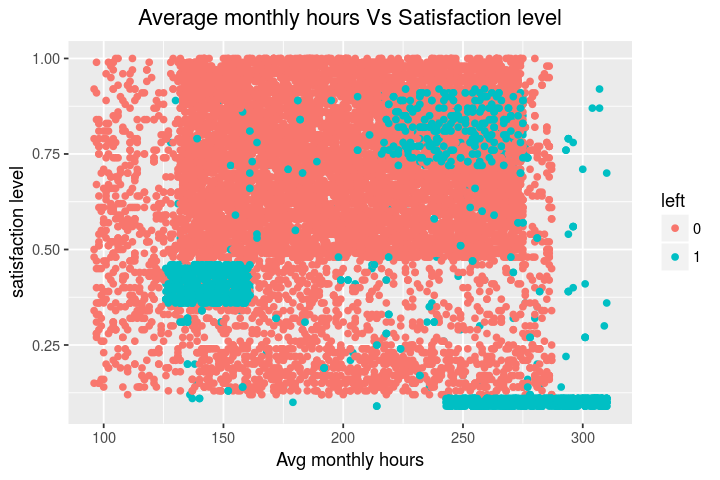

In [29]:
# Let's see how average_montly_hours is affecting satisfaction level

require(repr)
options(repr.plot.width = 6, repr.plot.height = 4)

library(ggplot2)

ggplot(aes(x=average_montly_hours, y = satisfaction_level, color=left), data = HR) +
        geom_point() +
        xlab('Avg monthly hours') +
        ylab('satisfaction level') +
        ggtitle('Average monthly hours Vs Satisfaction level')+
        theme(plot.title = element_text(hjust = 0.5))

**left=0 means** ***not_left*** whereas **left =1 means** ***left***   

1. There is attrition among employees whose average monthly hours are greater than ~200(cluster of light blue dots to the bottom right). This could be due to burnout with excessive work?   

2. There is also attrition among employees whose average monthly hours are less than 200 (cluster of light blue dots to the middle left) and their satisfaction level is below 0.5. This needs to be investigated as there could be other reason(s) for their attrition. 

3. What's interesting is there is attrition among employees whose satisfaction levels are above 0.5 and their avg monthly hours also greater than 200 (cluster of light blue dots to the top right corner **(though it is not strong cluster)**). ***Is this the case of burn-out or are there any other reasons?***

In [30]:
# Investigate the correlation between 'average_montly_hours' and 'satisfaction_level'

round(cor(HR$average_montly_hours, HR$satisfaction_level),2)

[1] -0.02

The average monthly hours and satisfaction level variables are **negatively correlated** but the **correlation is not strong enough**. This suggests that there are other factors apart from average monthly hours which is affecting satisfaction levels.

In [31]:
# Summary of 'satisfaction_level' by 'left' 

by(HR$satisfaction_level, HR$left, summary)

HR$left: 0
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1200  0.5400  0.6900  0.6668  0.8400  1.0000 
------------------------------------------------------------ 
HR$left: 1
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0900  0.1300  0.4100  0.4401  0.7300  0.9200 

**left=0 means** ***not_left*** whereas **left =1 means** ***left***   

As expected, the average satisfaction level is low among employees who left the firm.

### Role of promotion_last_5years variable in attrition

In [32]:
# Promotion_last_5years Vs Salary category

promotion <- round(prop.table(table(HR$promotion_last_5years, HR$salary.scale)),3)

row.names(promotion) <- c('not promoted', 'promoted')

promotion

              
                 low medium  high
  not promoted 0.483  0.418 0.078
  promoted     0.004  0.012 0.005

**Promotion percentage among Medium salaried employees is high** compared to low and high salaried employees.  

This could be one of the reasons for high attrition among low salaried employees.

In [33]:
# Promotion_last_5years Vs department

promotion <- round(prop.table(table(HR$department, HR$promotion_last_5years)),3)

colnames(promotion) <- c('not promoted', 'promoted')

promotion

             
              not promoted promoted
  IT                 0.082    0.000
  RandD              0.051    0.002
  accounting         0.050    0.001
  hr                 0.048    0.001
  management         0.037    0.005
  marketing          0.054    0.003
  product_mng        0.060    0.000
  sales              0.269    0.007
  support            0.147    0.001
  technical          0.179    0.002

**This table is interesting as sales department has high number of promotions in last 5 years compared to other departments. But, we saw high attrition in sales department.**  

This suggests that 'promotion_last_5years' is not a strong contributor for attrition in sales department.

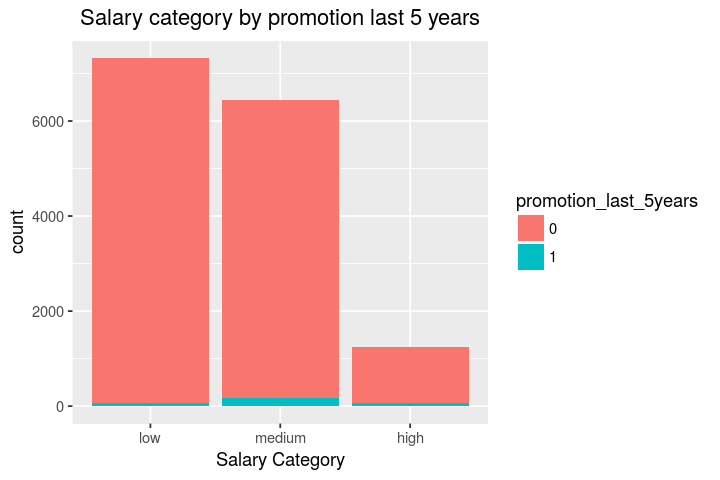

In [34]:
# Bar plot by Salary Category, promotion_last_5years
## Promotion_last_5years 0 = No Promotion, Promotion_last_5years 1 = Promoted

require(repr)
options(repr.plot.width = 6, repr.plot.height = 4)

library(ggplot2)

ggplot(aes(salary.scale, fill=promotion_last_5years), data=HR)+
    geom_bar() +
    xlab('Salary Category') +
    ggtitle('Salary category by promotion last 5 years')+
    theme(plot.title = element_text(hjust = 0.5))

### Role of number of projects variable in attrition

In [35]:
# 'number_project' Vs 'left'

projects <- round(prop.table(table(HR$number_project, HR$left)),2)

colnames(projects) <- c('not_left', 'left')

projects

   
    not_left left
  2     0.05 0.10
  3     0.27 0.00
  4     0.26 0.03
  5     0.14 0.04
  6     0.03 0.04
  7     0.00 0.02

**Initial observation:** Attrition is high among employees who worked in less than 3 projects and also among employees who worked in more than 5 projects.

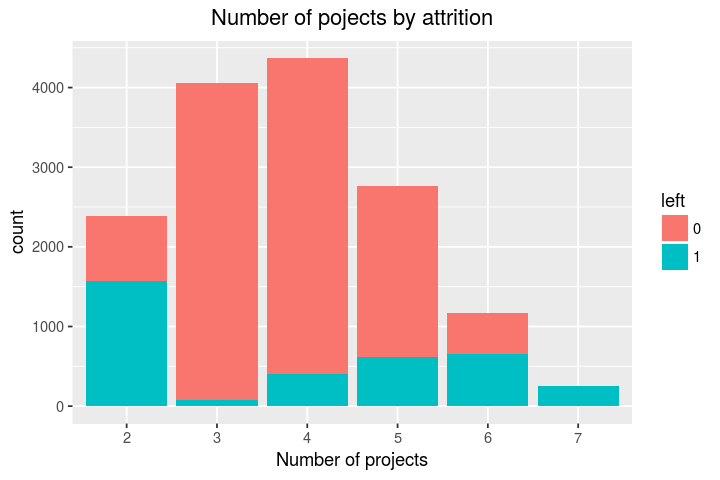

In [36]:
# Bar plot 'number_project', 'left'

require(repr)
options(repr.plot.width = 6, repr.plot.height = 4)

library(ggplot2)

ggplot(aes(number_project, fill=left), data=HR) +
    geom_bar() +
    xlab('Number of projects') +
    ggtitle('Number of pojects by attrition')+
    theme(plot.title = element_text(hjust = 0.5))


This bar plot correlates with the table above. All the Employees who worked in greater than 6 projects left the company. Is this due to excessive work?

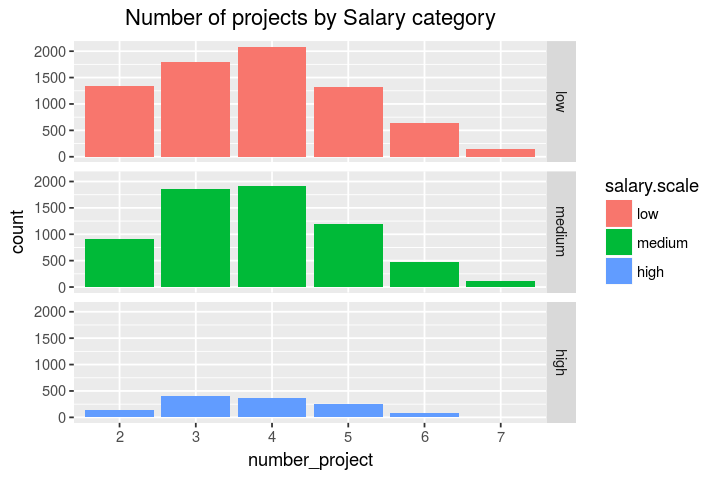

In [37]:
# Distribution of number_project by Salary category

require(repr)
options(repr.plot.width = 6, repr.plot.height = 4)

library(ggplot2)

ggplot(aes(x=number_project, fill=salary.scale), data=HR) +
        geom_bar() +
        facet_grid(salary.scale ~ .) +
        ggtitle('Number of projects by Salary category')+
        theme(plot.title = element_text(hjust = 0.5))

As found out, employees who worked in greater than 6 projects have left the company. All those employees belong to low and medium salaried groups. This could be one of the reasons for high attrition among those groups.

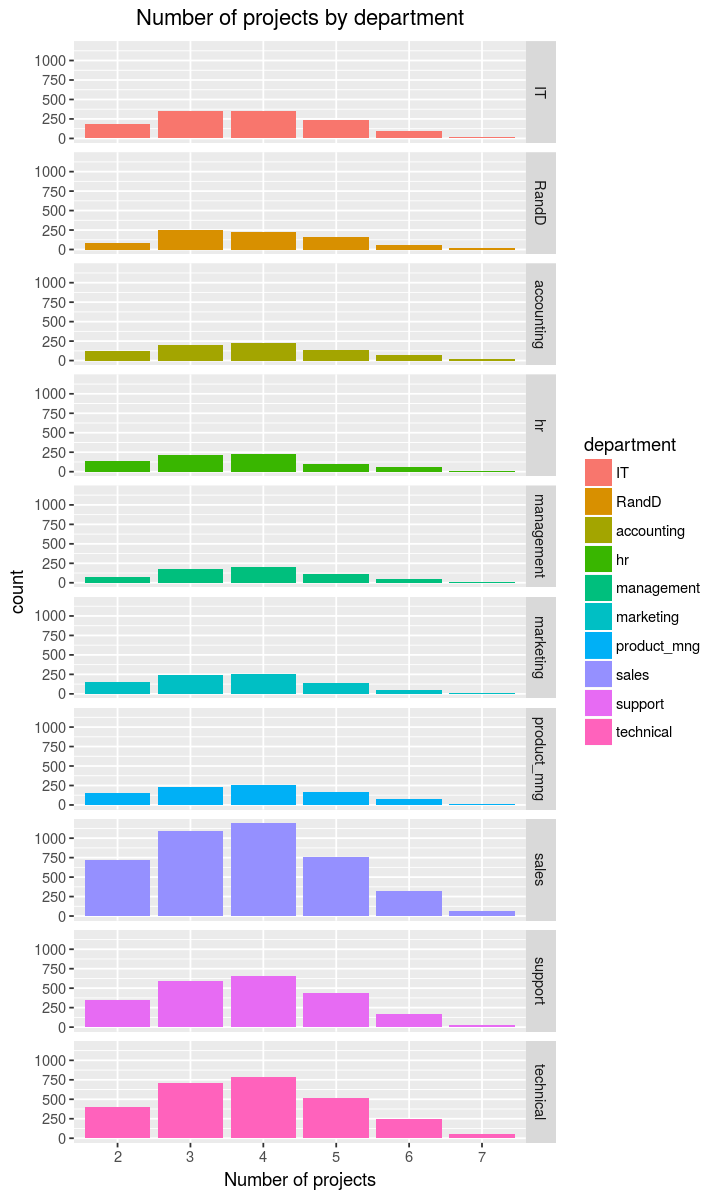

In [38]:
# Distribution of number_project by department

require(repr)
options(repr.plot.width = 6, repr.plot.height = 10)

library(ggplot2)

ggplot(aes(x=number_project, fill=department), data=HR) +
        geom_bar() +
        facet_grid(department ~ .) +
        xlab('Number of projects') +
        ggtitle('Number of projects by department')+
        theme(plot.title = element_text(hjust = 0.5))


**The number of projects handled by Sales department is high** followed by technical and support departments.

In [39]:
# 'number_project' by 'department'

round(addmargins(prop.table(table(HR$department, HR$number_project))),2)


,2,3,4,5,6,7,Sum
IT,0.01,0.02,0.02,0.02,0.01,0.00,0.08
RandD,0.01,0.02,0.02,0.01,0.00,0.00,0.05
accounting,0.01,0.01,0.01,0.01,0.00,0.00,0.05
hr,0.01,0.01,0.01,0.01,0.00,0.00,0.05
management,0.01,0.01,0.01,0.01,0.00,0.00,0.04
marketing,0.01,0.02,0.02,0.01,0.00,0.00,0.06
product_mng,0.01,0.02,0.02,0.01,0.00,0.00,0.06
sales,0.05,0.07,0.08,0.05,0.02,0.00,0.28
support,0.02,0.04,0.04,0.03,0.01,0.00,0.15
technical,0.03,0.05,0.05,0.03,0.02,0.00,0.18


As per the table above, the large percentage of projects were handled by Sales department. Is this the reason for high attrition in that department due to excessive work? 

In [40]:
# 'number_project' by 'salary.scale'

round(addmargins(prop.table(table(HR$salary.scale, HR$number_project))),2)

,2,3,4,5,6,7,Sum
low,0.09,0.12,0.14,0.09,0.04,0.01,0.49
medium,0.06,0.12,0.13,0.08,0.03,0.01,0.43
high,0.01,0.03,0.02,0.02,0.00,0.00,0.08
Sum,0.16,0.27,0.29,0.18,0.08,0.02,1.00


As per the table above, the **large percentage of projects were handled by low & medium salaried employees.** Is this one of the reasons for high attrition among those groups due to excessive work?

### Role of last_evaluation variable in attrition

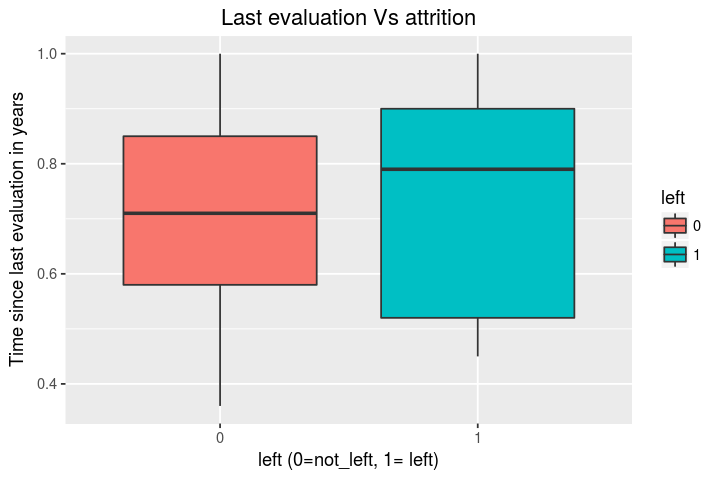

In [41]:
# Box plot of last_evaluation Vs left

require(repr)
options(repr.plot.width = 6, repr.plot.height = 4)

library(ggplot2)

ggplot(aes(x=left,y=last_evaluation, fill = left), data=HR) +
    geom_boxplot() +
    xlab('left (0=not_left, 1= left)') +
    ylab('Time since last evaluation in years') +
    ggtitle('Last evaluation Vs attrition')+
    theme(plot.title = element_text(hjust = 0.5))

**The average time since last evaluation seems to be higher for employees who left the company compared to those who didn't.**

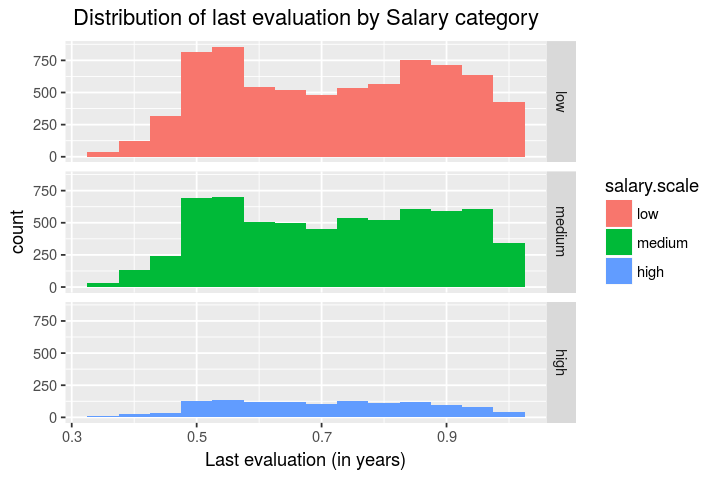

In [42]:
# Distribution of last_evaluation by salary category

require(repr)
options(repr.plot.width = 6, repr.plot.height = 4)

library(ggplot2)

ggplot(aes(last_evaluation, fill=salary.scale), data=HR) +
    geom_histogram(binwidth=0.05) +
    facet_grid(salary.scale ~ .) +
    xlab('Last evaluation (in years)') +
    ggtitle('Distribution of last evaluation by Salary category')+
    theme(plot.title = element_text(hjust = 0.5))


In [43]:
# last_evaluation Vs salary.scale

by(HR$last_evaluation, HR$salary.scale, summary)

HR$salary.scale: low
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.360   0.550   0.720   0.717   0.870   1.000 
------------------------------------------------------------ 
HR$salary.scale: medium
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3600  0.5600  0.7200  0.7173  0.8700  1.0000 
------------------------------------------------------------ 
HR$salary.scale: high
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3600  0.5700  0.7000  0.7043  0.8400  1.0000 

The average time since last evaluation is slightly higher among low and medium salaried employees. That to some extent explains attrition among these groups.

In [44]:
# last_evaluation Vs department

by(HR$last_evaluation, HR$department, summary)

HR$department: IT
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3700  0.5600  0.7200  0.7168  0.8600  1.0000 
------------------------------------------------------------ 
HR$department: RandD
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3600  0.5650  0.7100  0.7121  0.8600  1.0000 
------------------------------------------------------------ 
HR$department: accounting
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3600  0.5600  0.7300  0.7177  0.8600  1.0000 
------------------------------------------------------------ 
HR$department: hr
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3700  0.5500  0.7200  0.7088  0.8650  1.0000 
------------------------------------------------------------ 
HR$department: management
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.370   0.590   0.730   0.724   0.860   1.000 
------------------------------------------------------------ 
HR$department: marketing
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3600  0.5500  

This is interesting. **The average time since last evaluation is less in Sales department compared to other high attrition departments (technical and Support)**. This doesn't explain attrition is high in Sales department. But, to some extent explains attrition among technical and Support groups.

### Observations:

- Observed high attrition in **Sales department** followed by **technical and support departments**.
- Observed high attrition among **low** salaried employees followed by **medium** salaried employees.
- **Work accident** variable seems to be one of the contributors for attrition in Sales department as the number of accidents is high in that department.
- **Attrition is high among employees who spent more number of years in the company.** Which to some extent makes sense. But, when this is looked at from another angle. It questions whether the company not able to provide growth for these employees? This is little worrying as old employees take away wealth of knowledge along with them when they leave the company. That could be looked as a loss to company.
- The average monthly hours seems to be not influencing attrition observed in Sales department and attrition among low and medium salaried employees. But, **average monthly hours seems to have affected the satisfaction level of employees** as attrition is seen among employees whose satisfaction level is below 0.5 and worked more than 200 hours per month.
- **Medium salaried employees had more promotions in last 5 years** compared to low and high salaried employees. This could be one of the reasons for high attrition among low salaried employees.
- **Promotions in Sales department shows a contrasting picture as that department received highest number of promotions in the last 5 years compared to other departments.** This shows Promotions is not a contributor for high attrition in that department.
- **There is attrition among Low and medium salaried employees who worked in more projects.** This could be one of contributing factors of attrition in those groups. Also, **Sales, technical and support departments handled a large number of projects.** This explains high attrition in those departments which is due to excessive work.
- The average time since **last evaluation is slightly higher among low and medium** salaried employees which explains attrition in those groups. But this variable doesn't explain attrition in sales department as last evaluation is less in that department compared to others.
 